## Logistic Regression: Coding Example

Gradient Descent for Logistic Regression is very similar to GD for Linear Regression. Essentially, the only difference is the hypothesis function used. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cluster_data = "..\\data-sets\\clusters.csv"

In [5]:
# logistic regression using gradient descent. 
#
# input: 
#   in - training data encoded as an (n x m) matrix (1 instance per row).
#   alpha - the learning rate, a floating point number. 
#   iterations - the number of iteratins to run the algorithm. 
#
# output: the weights (coefficients) of the linear model.  
#
# For the input, assume that the target attribute is in the last column. 
def gradient_descent(indata, alpha, iterations):
    # get the number of rows and columns in the input data. 
    # get the number of rows and columns in the input data. 
    (rows, cols) = indata.shape; 
   
    # create a row vector of weights for each input column,
    # initialized to 0. 
    weights = np.zeros(cols);
    
    # 1) 
    # Prepend  a column of 1s to the instances (for the y-intercept)
    # 2) 
    # Separate the input attributes from the target attribute, forming
    # two matrices.
    instances = np.hstack((np.ones((rows,1)), indata[:,:-1]))
    targets = indata[:,-1] 
    
    # initialize a list to store the error at each iteration (for graphing). 
    errList = np.zeros(iterations);
    
    # run gradient descient for the given number of instances. 
    for i in range(iterations):
        # Compute model for each instance: Multiply instance input matrix
        # (n x m) by (m x 1) weight vector to get (n x 1) matrix of predictions.  
        model = compute_model(instances,weights);
        
        # 5) For each instance D, compute the difference D_i between the target and the predicted value. 
        diff = (model - targets);
        # 6) Update the weights w_1, w_2, ..., w_m. For each column position j: 
        for j in range(cols):
          # 6.1) multiply each instance i's attribute value x_j by D_i
          # 6.2) Sum the results of 6.1 together. 
            dJ = np.sum(diff * instances[:,j])
          # 6.3) multiply 6.2's value by alpha and subract the result
          # from w_j. This yields the new value for w_j
            weights[j] = weights[j] - alpha*dJ
        # add the count for correctly classified instances for this iteration
        errList[i] = num_correct(model, targets)
    return (weights, model, targets, errList)

def compute_model(inst, w):
    return 1/(1+np.exp(-1*inst.dot(w)))

In [6]:
# count correct predictions
def num_correct(model, targets):
    return np.sum(classes(model) == classes(targets))
 
# convert h(x) to a class (True or False)
def classes(model):
    return model >= 0.5

weights: [-8.03400333  0.29969472  0.25257396]
count: 1000 correct: 960 accuracy: 0.96


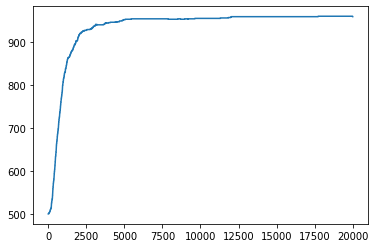

In [7]:
df = pd.read_csv(filepath_or_buffer=cluster_data)
data = df.values
(w,predicted, target, e) = gradient_descent(data, 0.00001, 20000)
print("weights:", w)
correct = np.sum(classes(predicted) == classes(target))
count = len(target)
print("count:", count, "correct:", correct, "accuracy:",correct/count)
plt.plot(e)
plt.show()

In [8]:
# line: ax + by + c = 0
# y = (-c -ax)/b
def myline(x,c,a,b):
    return (-c - a*x)/b

## Show Scatter Plot

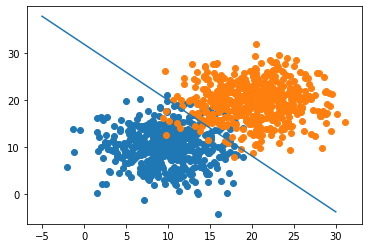

In [9]:
x1vals = data[:500,0]
y1vals = data[:500,1]
x2vals = data[500:,0]
y2vals = data[500:,1]
plt.scatter(x1vals,y1vals)
plt.scatter(x2vals,y2vals)
x = np.linspace(-5, 30, 1000)
plt.plot(x,myline(x,w[0],w[1], w[2]))
plt.show()



## Compare output to scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression

df2 = pd.read_csv(filepath_or_buffer=cluster_data,header=0)

x_train=df2.values[:,:-1]
y_train=df2.values[:,-1]

logistic = LogisticRegression()
# fit the data
logistic.fit(x_train, y_train)

# print out the linear model
print("coefficients: ", logistic.coef_)
print("intercept: ", logistic.intercept_)
#compute predicted values on test test;
predicted = logistic.predict(x_train);

print("accuracy",logistic.score(x_train,y_train))


coefficients:  [[0.67512338 0.56439315]]
intercept:  [-18.40575857]
accuracy 0.967


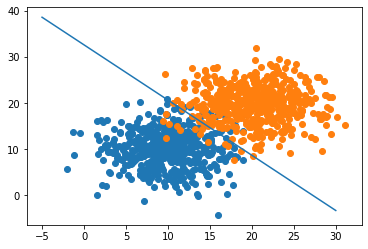

In [11]:
x1vals = data[:500,0]
y1vals = data[:500,1]
x2vals = data[500:,0]
y2vals = data[500:,1]
plt.scatter(x1vals,y1vals)
plt.scatter(x2vals,y2vals)
x = np.linspace(-5, 30, 1000)
plt.plot(x,myline(x,logistic.intercept_,logistic.coef_[0][0], logistic.coef_[0][1]))
plt.show()